In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML
HTML("""
<style>
    table.dataframe td, table.dataframe th {
        font-size: 8 px;
    }
</style>
""")

# Загрузка данных
df = pd.read_csv('C:/SQL/Проекты/trending youtube videos statistics/USvideos.csv')

- 1.  Фильмы и анимация
- 2.  Автомобили и транспорт
- 10. Музыка
- 15. Домашние животные и животные
- 17. Спорт
- 19. Путешествия и события
- 20. Игры
- 22. Люди и блоги
- 23. Комедия
- 24. Развлечения
- 25. Новости и политика
- 26. Как сделать и стиль
- 27. Образование
- 28. Наука и технологии
- 29. Некоммерческие организации и активизм
- 43. Шоу

In [6]:
# Загрузка данных
df = pd.read_csv('C:/SQL/Проекты/trending youtube videos statistics/USvideos.csv')

In [7]:
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [8]:
# Ознакамливаемся с колонками
df.columns 

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [9]:
#Типы данных и пропуски
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [10]:
# Удаляем дубликаты
df = df.drop_duplicates()

In [11]:
# Преобразуем 'trending_date' в datetime-формат.
# Формат даты нестандартный (год.день.месяц), поэтому явно указываем порядок с помощью параметра 'format'.
# Некорректные значения будут заменены на NaT.
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')

# Преобразуем 'publish_time' в datetime, чтобы можно было работать с временем публикации (дата + время).
# Если попадутся ошибочные значения, они будут автоматически заменены на NaT.
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

In [12]:
# Исследуем пропущенные значения
df.isnull().sum()
# Пропуски оставлены:
# - description это не ключевой столбец
# - В других важных столцах нет пропусков

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               569
dtype: int64

In [13]:
# Создаём новые признаки: длина заголовка и описания 
df['title_length'] = df['title'].astype(str).apply(len)
df['description_length'] = df['description'].astype(str).apply(len)

In [14]:
# Генерация признака количества тегов
# Для каждого видео рассчитываем количество тегов
# Это позволит в дальнейшем проанализировать влияние тегов на просмотры
df['tags_count'] = df['tags'].apply(lambda x: len(str(x).split('|')) if pd.notnull(x) else 0)

In [15]:
# Выбираю только нужные столбцы и удаляя все строки с пропущенными значениями
df_cleaned = df[[
    'video_id', 'title', 'channel_title', 'category_id', 'publish_time',
    'views', 'likes', 'dislikes', 'comment_count', 'tags_count',
    'title_length', 'description_length'
]].dropna()

In [16]:
# Сохраняем очищенные и подготовленные данные в CSV
# Файл будет использоваться для последующего анализа в SQL (в DBeaver)
df_cleaned.to_csv("youtube_cleaned.csv", index=False)

In [17]:
df_cleaned.describe()

,category_id,views,likes,dislikes,comment_count,tags_count,title_length,description_length
count,40901.000000,4.090100e+04,4.090100e+04,4.090100e+04,4.090100e+04,40901.000000,40901.000000,40901.000000
mean,19.970588,2.360678e+06,7.427173e+04,3.711722e+03,8.448567e+03,19.732085,48.578617,1031.373634
std,7.569362,7.397719e+06,2.289999e+05,2.904624e+04,3.745139e+04,12.013200,19.621774,854.877534
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,3.000000,1.000000
25%,17.000000,2.419720e+05,5.416000e+03,2.020000e+02,6.130000e+02,10.000000,34.000000,419.000000
50%,24.000000,6.810640e+05,1.806900e+04,6.300000e+02,1.855000e+03,19.000000,46.000000,826.000000
75%,25.000000,1.821926e+06,5.533800e+04,1.936000e+03,5.752000e+03,29.000000,61.000000,1388.000000
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,69.000000,100.000000,5123.000000


#### views (просмотры):
* Среднее: 2.36 млн
* Медиана: 681 тыс.
##### Среднее значительно выше медианы что свидетельствует о сильных выбросах  



#### likes (лайки):
* Среднее: 121 тыс.
* Медиана: 25 тыс.
##### Схоже с просмотрами, распределение также сдвинуто в право



# Следующие SQL-запросы были выполнены с использованием DBeaver.

### Анализ видео: количество и период

-- Сколько всего видео, за какой период данные

```sql
SELECT 
    COUNT(*) AS total_videos,
    MIN(publish_time) AS first_date,
    MAX(publish_time) AS last_date
FROM youtube_cleaned;

| Количество видео | Дата первого видео      | Дата последнего видео   |
| ---------------- | ----------------------- | ----------------------- |
| 40,901           | 2006-07-23 08:24:11.000 | 2018-06-14 01:31:53.000 |


### 📌 Самые популярные категории видео по средним просмотрам

```sql
-- Самые популярные категории
SELECT category_id, 
    CASE category_id
        WHEN 1 THEN 'Film & Animation'
        WHEN 2 THEN 'Autos & Vehicles'
        WHEN 10 THEN 'Music'
        WHEN 15 THEN 'Pets & Animals'
        WHEN 17 THEN 'Sports'
        WHEN 19 THEN 'Travel & Events'
        WHEN 20 THEN 'Gaming'
        WHEN 22 THEN 'People & Blogs'
        WHEN 23 THEN 'Comedy'
        WHEN 24 THEN 'Entertainment'
        WHEN 25 THEN 'News & Politics'
        WHEN 26 THEN 'Howto & Style'
        WHEN 27 THEN 'Education'
        WHEN 28 THEN 'Science & Technology'
        WHEN 29 THEN 'Nonprofits & Activism'
        WHEN 43 THEN 'Shows'
        ELSE 'Unknown'
    END AS category_name, 
    AVG(views) AS Average_Views,
    COUNT(*) AS video_count
FROM youtube_cleaned 
GROUP BY category_id
ORDER BY Average_Views DESC 
LIMIT 5

| Category ID | Category Name         | Average Views | Video Count |
| ----------- | --------------------- | ------------- | ----------- |
| 10          | Music                 | 6,204,776.02  | 6,467       |
| 1           | Film & Animation      | 3,101,917.38  | 2,343       |
| 29          | Nonprofits & Activism | 2,963,884.07  | 57          |
| 20          | Gaming                | 2,607,597.77  | 816         |
| 24          | Entertainment         | 2,067,689.25  | 9,944       |



* Музыкальные видео набирают наибольшее среднее количество просмотров что совсем неудивительно, 
музыка имеет очень широкую аудиторию и постоянную аудиторию
* Фильмы и анимации занимает второе место тоже благодаря визуальной привлекательности
* Nonprofits & Activism занимает третье место что неожиданно, значит высокая вовлеченность аудитории на сациально значимые темы
* Игры и развлечения на треьем месте, хоть и очень популярны, для меня ожидался в топ три но все таки уступают первым трем
* Массовость видео не влияыет на просмотры
* В целом результаты интуитивно понятны, развлекательный контент всегда был в топе

### 📌 В какие дни недели публикуют самые просматриваемые видео

```sql
-- Анализ среднего количества просмотров по дням недели публикации

SELECT 
    EXTRACT(DOW FROM publish_time) AS day_of_week, 
    CASE 
        WHEN EXTRACT(DOW FROM publish_time) = 0 THEN 'Воскресенье'
        WHEN EXTRACT(DOW FROM publish_time) = 1 THEN 'Понедельник'
        WHEN EXTRACT(DOW FROM publish_time) = 2 THEN 'Вторник'
        WHEN EXTRACT(DOW FROM publish_time) = 3 THEN 'Среда'
        WHEN EXTRACT(DOW FROM publish_time) = 4 THEN 'Четверг'
        WHEN EXTRACT(DOW FROM publish_time) = 5 THEN 'Пятница'
        WHEN EXTRACT(DOW FROM publish_time) = 6 THEN 'Суббота'
        ELSE 'Неизвестно'
    END AS weekday_name,  
    AVG(views) AS average_views  
FROM youtube_cleaned
GROUP BY day_of_week, weekday_name 
ORDER BY average_views DESC;

| День недели | Среднее количество просмотров |
| ----------- | ----------------------------- |
| Пятница     | 3,374,782.25                  |
| Воскресенье | 2,959,765.43                  |
| Четверг     | 2,311,230.62                  |
| Вторник     | 2,053,956.24                  |
| Среда       | 2,017,862.05                  |
| Понедельник | 1,992,703.54                  |
| Суббота     | 1,728,904.45                  |


* Пятница и Воскресенье лидер по просмотрам, видимо в конце недели люди расслабляются и больше свободного времени
* Вторник, Четверг, Среда тоже осень сильные дни для просмотров что не сильно уступают пятнице. Удивительно ведь это рабочие дни
* Понедельник и Субота наименьшее количествот просмотров, понедельник понятно первый рабочий день. А в субботу возможно пользователи проводят оффлайн

### 📌 Влияет ли количество тегов на популярность видео?

```sql
-- Влияет ли количество тегов на популярность:
SELECT tags_count,
       ROUND(AVG(views), 2) AS avg_views,
       COUNT(*) AS video_count
FROM youtube_cleaned
GROUP BY tags_count
ORDER BY avg_views DESC
LIMIT 6

| Tag Count | Average Views    | Video Count |
|-----------|------------------|--------------|
| **52**    | 14,400,253.89    | 19           |
| **4**     | 6,114,888.68     | 1,403        |
| **56**    | 4,978,951.34     | 35           |
| **37**    | 4,234,808.30     | 516          |
| **41**    | 3,895,276.93     | 262          |
| **24**    | 3,861,294.17     | 1,253        |


* Видео с большим количеством тегов (например 52) получают большое количество просмотров, но таких видео мало. 
* Основная часть (4-24 тега) показывают умеренные показатели просмотров от ~3 до 6 млн.
* Большое количество тегов может положительно влият на просмотры но это не законормерность так как с малым кол-м тегов тоже набирают средние просмотры.
* А так же на просмотры могут влият другие факторы как тренд, канал, качество контента

* Заключение: Большое количество тегов может влиять на популярность но не является единственным фактором.

In [29]:
# Загружаем подготовленные данные в DBeavere
data = pd.read_csv('C:/SQL/Проекты/trending youtube videos statistics/_Влияет_ли_количество_тегов_на_популярность_SELECT_tags_count_ro_202505281625.csv')
data.head(3)

,tags_count,avg_views,video_count
0,52,14400253.89,19
1,4,6114888.68,1403
2,56,4978951.34,35


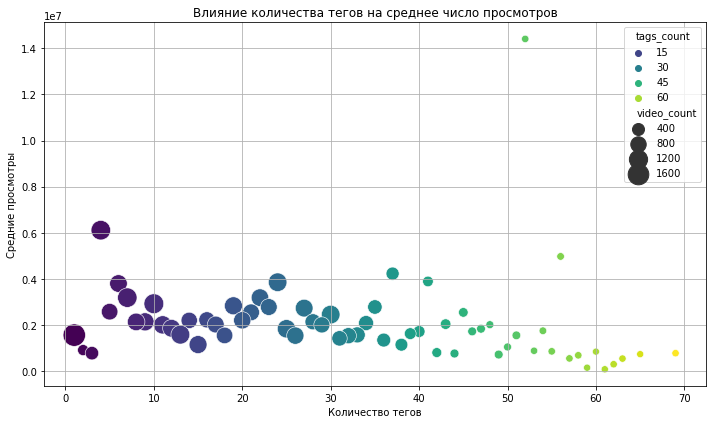

In [37]:
# Строим график на "Влияние количества тегов на среднее число просмотров"
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,  
    x='tags_count',
    y='avg_views',
    size='video_count',
    hue='tags_count',
    palette='viridis',
    sizes=(50, 500),
    legend='brief')
plt.title('Влияние количества тегов на среднее число просмотров')
plt.xlabel('Количество тегов')
plt.ylabel('Средние просмотры')
plt.grid(True)
plt.tight_layout()
plt.show()

* Видео с малым количеством (10-30) тегов показывают высокие просмотры особенно если их много (размер круга)
* Видео большим количеством тегов > 50 не дают стальбиотных больших просмотров
* Нет строгой корреляции между большим количеством тегов и просмотрами
* Гипотеза: "чем больше тегов тем больше просмотров" не потверждена
* Очевидно анализ нужно проводить глубже включая другие параметры такие как: бренд, стабильность, тренд, канал, категория, длительность, тип контента.

```sql 
-- Топ-8 видео по среднему количеству просмотров на YouTube

   SELECT
    category_id,
    title,
    publish_time,
    ROUND(AVG(views)) AS avg_views,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY views) AS median_views
FROM youtube_cleaned 
GROUP BY category_id, title, publish_time
ORDER BY avg_views DESC
LIMIT 8


| Category ID | Title                                                | Avg Views   | Median Views  |
| ----------- | ---------------------------------------------------- | ----------- | ------------- |
| 10          | Childish Gambino - This Is America (Official Video)  | 150,339,551 | 162,556,776   |
| 24          | YouTube Rewind: The Shape of 2017 \| #YouTubeRewind  | 97,600,130  | 107,393,099.5 |
| 10          | BTS (방탄소년단) 'FAKE LOVE' Official MV                  | 91,656,307  | 95,346,333.5  |
| 10          | Ariana Grande - No Tears Left To Cry                 | 76,464,566  | 76,615,825    |
| 24          | Marvel Studios' Avengers: Infinity War Trailer       | 74,387,267  | 80,360,459    |
| 10          | Maluma - El Préstamo (Official Video)                | 68,005,487  | 68,480,947    |
| 10          | Becky G, Natti Natasha - Sin Pijama (Official Video) | 59,148,564  | 56,755,211.5  |
| 10          | Cardi B, Bad Bunny & J Balvin - I Like It            | 56,034,904  | 57,041,045.5  |


* Абсолютный лидер — "This Is America"   
Оно опережает всех по среднему показателя и по медиане
* Категория 10 (music) лидирует   
Из 8 видео в лиерах 6 музыкальные  
Что потверждает огромную популярность музыкального контенда
* Медианные значения часто выше средних, особенное у лидеров 
 Что означает стабильный интерес и лояльную аудиторию, без сильных выбросоа в просмотрах

```sql 

--Самые "долгоиграющие" видео по продолжительности и просмотрам

SELECT
    title,
    channel_title,
    duration_sec / 60 AS min,
    views
FROM youtube_cleaned
WHERE duration_sec > 600
ORDER BY views DESC
LIMIT 10

| Title                                                | Channel             | Duration (мин) | Views       |
| ---------------------------------------------------- | ------------------- | -------------- | ----------- |
| Childish Gambino - This Is America (Official Video)  | ChildishGambinoVEVO | 11             | 225,211,923 |
| Childish Gambino - This Is America (Official Video)  | ChildishGambinoVEVO | 14             | 220,490,543 |
| Childish Gambino - This Is America (Official Video)  | ChildishGambinoVEVO | 10             | 217,750,076 |
| YouTube Rewind: The Shape of 2017 \| #YouTubeRewind  | YouTube Spotlight   | 10             | 137,843,120 |
| Childish Gambino - This Is America (Official Video)  | ChildishGambinoVEVO | 12             | 134,839,555 |
| Ariana Grande - No Tears Left To Cry                 | ArianaGrandeVevo    | 12             | 117,735,467 |
| Childish Gambino - This Is America (Official Video)  | ChildishGambinoVEVO | 11             | 116,581,406 |
| YouTube Rewind: The Shape of 2017 \| #YouTubeRewind  | YouTube Spotlight   | 14             | 113,874,632 |
| BTS (방탄소년단) 'FAKE LOVE' Official MV                  | ibighit             | 11             | 111,882,133 |
| Becky G, Natti Natasha - Sin Pijama (Official Video) | BeckyGVEVO          | 10             | 104,400,749 |


